In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

0.0 [0.0003317] [9.70245647e-06] 0.939990909330735
0.0 [3.67080687e-05] [6.23305528e-07] 0.9927853026671535
0.0 [5.03604244e-06] [1.58354374e-07] 0.9351908086897854


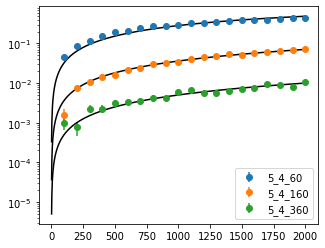

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5,4), sharey=True)

codes = [
    "5_4_60",
    "5_4_160",
    "5_4_360",
    # "5_4_660"
    # "5_4_1800"
]
p_masks = [0.]


def fun(x, a):
    return 1 - (1 - a)**x
params = []

for i, code in enumerate(codes):
    df = pd.read_csv(f"./{code}/iterative_masked_decoding.res")
    df['p_error'] = 1 - df['p_log']
    df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['no_test'])
    # df['p_std_dev'].replace(to_replace=0, value=1e-2, inplace=True)

    def fun(x, a):
        return 1 - (1 - a)**x

    cutoff = 0
    upper_cutoff = 2000
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    for k, j in enumerate(p_masks):
        df = df[df['t'] <= upper_cutoff]
        tmp_df = df[(df['p_mask'] == j) & (df['t'] >= cutoff) & (df['p_std_dev'] > 0)]
        
        tmp_df_fit = df[(df['p_mask'] == j) & (df['t'] >= cutoff)]
        tmp_df_before = df[(df['p_mask'] == j) & (df['t'] < cutoff)]

        ax.errorbar(tmp_df_fit['t'], tmp_df_fit['p_error'], tmp_df_fit['p_std_dev'], label=f'{code}', fmt='o', c=colors[i])
        ax.errorbar(tmp_df_before['t'], tmp_df_before['p_error'], tmp_df_before['p_std_dev'], fmt='x', alpha=0.8)

        popt, pcov = curve_fit(fun, tmp_df['t'], tmp_df['p_error'], maxfev=1000, p0=(0.001),sigma=tmp_df['p_std_dev'])
        print(j, popt, np.sqrt(np.diag(pcov)), r2_score(tmp_df['p_error'], fun(tmp_df['t'], *popt)))
        params.append(popt[0])
        xx = np.linspace(1, upper_cutoff, 1000)
        yy = fun(xx, *popt)
        ax.plot(xx, yy, c='k')

plt.yscale('log')
plt.legend(loc='lower right')